# РК2 ИУ5-61Б Овчинников Степан

### Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')
sns.set(style="ticks")
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('marvel-wikia-data.csv')

In [3]:
data.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


In [4]:
data.dtypes

page_id               int64
name                 object
urlslug              object
ID                   object
ALIGN                object
EYE                  object
HAIR                 object
SEX                  object
GSM                  object
ALIVE                object
APPEARANCES         float64
FIRST APPEARANCE     object
Year                float64
dtype: object

In [5]:
# Заполняем отсутствующие значения 
data['Year'] = data['Year'].replace(0,np.nan)
data['Year'] = data['Year'].fillna(data['Year'].mean())
data['APPEARANCES'] = data['APPEARANCES'].replace(0,np.nan)
data['APPEARANCES'] = data['APPEARANCES'].fillna(data['APPEARANCES'].mean())

In [6]:
data.drop(['GSM'], axis = 1, inplace = True)

In [7]:
data.isnull().sum()
# проверим есть ли пропущенные значения

page_id                0
name                   0
urlslug                0
ID                  3770
ALIGN               2812
EYE                 9767
HAIR                4264
SEX                  854
ALIVE                  3
APPEARANCES            0
FIRST APPEARANCE     815
Year                   0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16376 entries, 0 to 16375
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   page_id           16376 non-null  int64  
 1   name              16376 non-null  object 
 2   urlslug           16376 non-null  object 
 3   ID                12606 non-null  object 
 4   ALIGN             13564 non-null  object 
 5   EYE               6609 non-null   object 
 6   HAIR              12112 non-null  object 
 7   SEX               15522 non-null  object 
 8   ALIVE             16373 non-null  object 
 9   APPEARANCES       16376 non-null  float64
 10  FIRST APPEARANCE  15561 non-null  object 
 11  Year              16376 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 1.5+ MB


In [9]:
data.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,Living Characters,2258.0,Nov-50,1950.0


<AxesSubplot:>

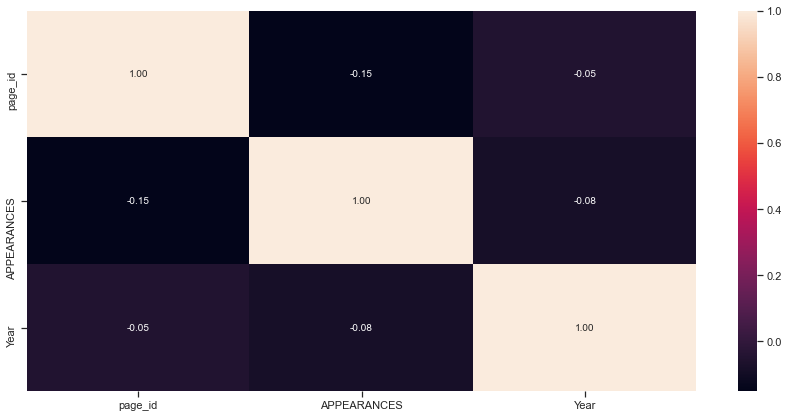

In [10]:
#Построим корреляционную матрицу
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

In [11]:
X = data.drop(['APPEARANCES','name','urlslug','ID','ALIGN','EYE','HAIR','SEX','ALIVE','FIRST APPEARANCE','page_id'], axis = 1)
Y = data.APPEARANCES
print('Входные данные:\n\n', X.head(), '\n\nВыходные данные:\n\n', Y.head())

Входные данные:

      Year
0  1962.0
1  1941.0
2  1974.0
3  1963.0
4  1950.0 

Выходные данные:

 0    4043.0
1    3360.0
2    3061.0
3    2961.0
4    2258.0
Name: APPEARANCES, dtype: float64


In [12]:
X_train,  X_test,  Y_train,  Y_test = train_test_split(X,  Y, random_state = 0, test_size = 0.1)
print('Входные параметры обучающей выборки:\n\n',X_train.head(), \
      '\n\nВходные параметры тестовой выборки:\n\n', X_test.head(), \
      '\n\nВыходные параметры обучающей выборки:\n\n', Y_train.head(), \
      '\n\nВыходные параметры тестовой выборки:\n\n', Y_test.head())

Входные параметры обучающей выборки:

         Year
832   2006.0
6894  2012.0
1836  2002.0
1952  1973.0
2200  1981.0 

Входные параметры тестовой выборки:

          Year
3180   1980.0
11366  1946.0
7530   1990.0
598    1982.0
8137   2007.0 

Выходные параметры обучающей выборки:

 832     45.0
6894     4.0
1836    20.0
1952    18.0
2200    16.0
Name: APPEARANCES, dtype: float64 

Выходные параметры тестовой выборки:

 3180     10.0
11366     1.0
7530      3.0
598      64.0
8137      3.0
Name: APPEARANCES, dtype: float64


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,  median_absolute_error, r2_score 

In [14]:
Lin_Reg = LinearRegression().fit(X_train, Y_train)

lr_y_pred = Lin_Reg.predict(X_test)

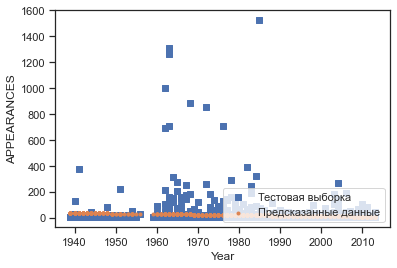

In [15]:
plt.scatter(X_test.Year, Y_test,    marker = 's', label = 'Тестовая выборка')
plt.scatter(X_test.Year, lr_y_pred, marker = '.', label = 'Предсказанные данные')
plt.legend (loc = 'lower right')
plt.xlabel ('Year')
plt.ylabel ('APPEARANCES')
plt.show()

In [16]:
from sklearn.ensemble import RandomForestRegressor

In [17]:
forest_1 = RandomForestRegressor(n_estimators=5, oob_score=True, random_state=10)
forest_1.fit(X, Y)

RandomForestRegressor(n_estimators=5, oob_score=True, random_state=10)

In [18]:
Y_predict = forest_1.predict(X_test)
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_test, Y_predict))
print('Средняя квадратичная ошибка:', mean_squared_error(Y_test, Y_predict))
print('Median absolute error:',       median_absolute_error(Y_test, Y_predict))
print('Коэффициент детерминации:',    r2_score(Y_test, Y_predict))

Средняя абсолютная ошибка: 22.610156190693722
Средняя квадратичная ошибка: 6356.295668616833
Median absolute error: 8.153709469956468
Коэффициент детерминации: 0.06329512693873562


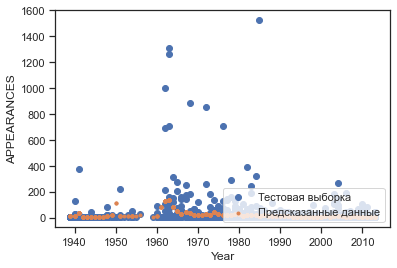

In [19]:
plt.scatter(X_test.Year, Y_test,    marker = 'o', label = 'Тестовая выборка')
plt.scatter(X_test.Year, Y_predict, marker = '.', label = 'Предсказанные данные')
plt.legend(loc = 'lower right')
plt.xlabel('Year')
plt.ylabel('APPEARANCES')
plt.show()